In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [5]:
data = pd.read_csv("C:\\Users\\admin\\Desktop\\dataset\\twitter_training.csv")
print(data.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [7]:
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None
2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64


In [9]:
data = data.drop_duplicates()

In [11]:
data.columns = ['ID', 'Topic', 'Sentiment', 'Text']
data['Text'] = data['Text'].fillna("")

C:\Users\admin\AppData\Local\Temp\ipykernel_10412\257413242.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Sentiment', palette='viridis')


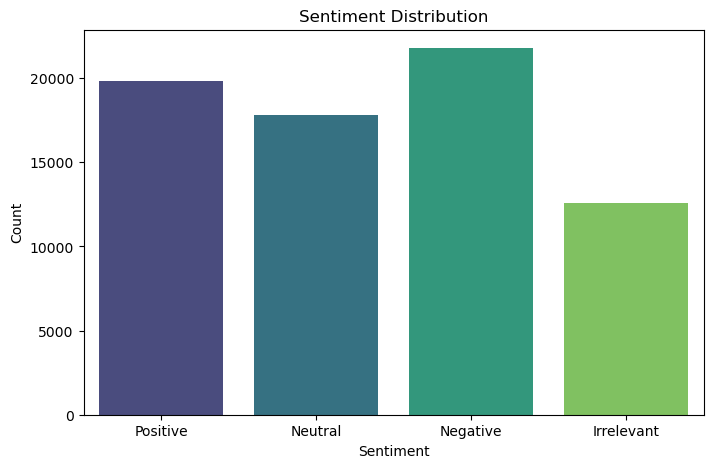

In [35]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [15]:
def get_common_words(text_data, num_words=10):
    """Extracts the most common words from a list of text data."""
    # Join all texts and remove special characters
    combined_text = " ".join(text_data)
    words = re.findall(r'\w+', combined_text.lower())  # Convert to lowercase and split
    common_words = Counter(words).most_common(num_words)
    return common_words

In [17]:
positive_common_words = get_common_words(data[data['Sentiment'] == 'Positive']['Text'])
neutral_common_words = get_common_words(data[data['Sentiment'] == 'Neutral']['Text'])
negative_common_words = get_common_words(data[data['Sentiment'] == 'Negative']['Text'])

In [19]:
def plot_common_words(common_words, sentiment):
    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f"Most Common Words in {sentiment} Sentiment")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_10412\1943327243.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


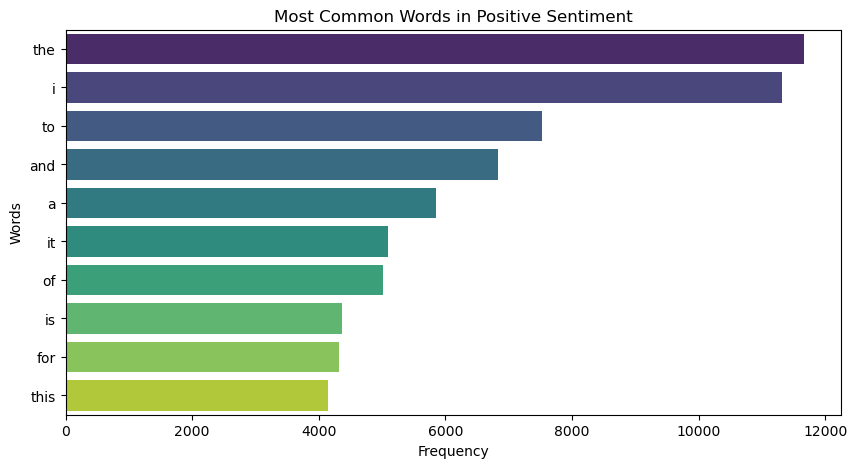

C:\Users\admin\AppData\Local\Temp\ipykernel_10412\1943327243.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


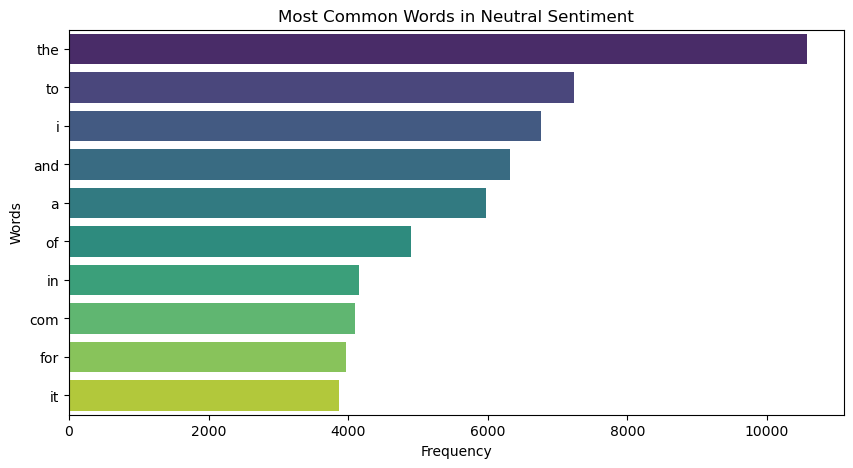

C:\Users\admin\AppData\Local\Temp\ipykernel_10412\1943327243.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


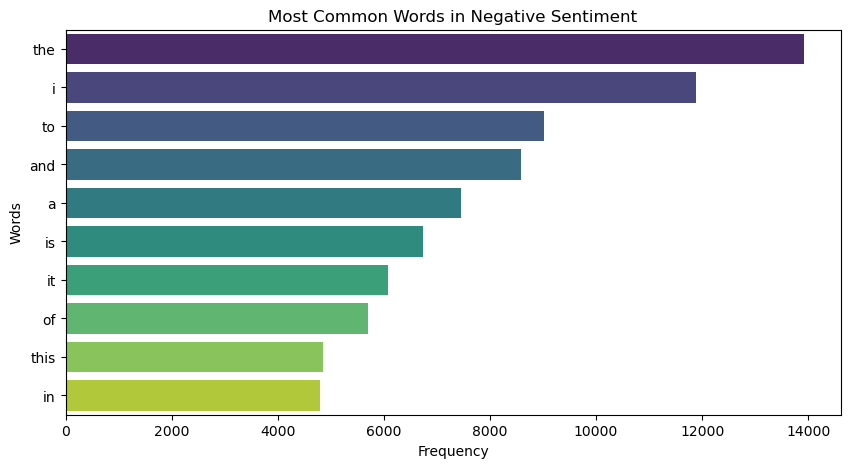

In [27]:
plot_common_words(positive_common_words, "Positive")
plot_common_words(neutral_common_words, "Neutral")
plot_common_words(negative_common_words, "Negative")

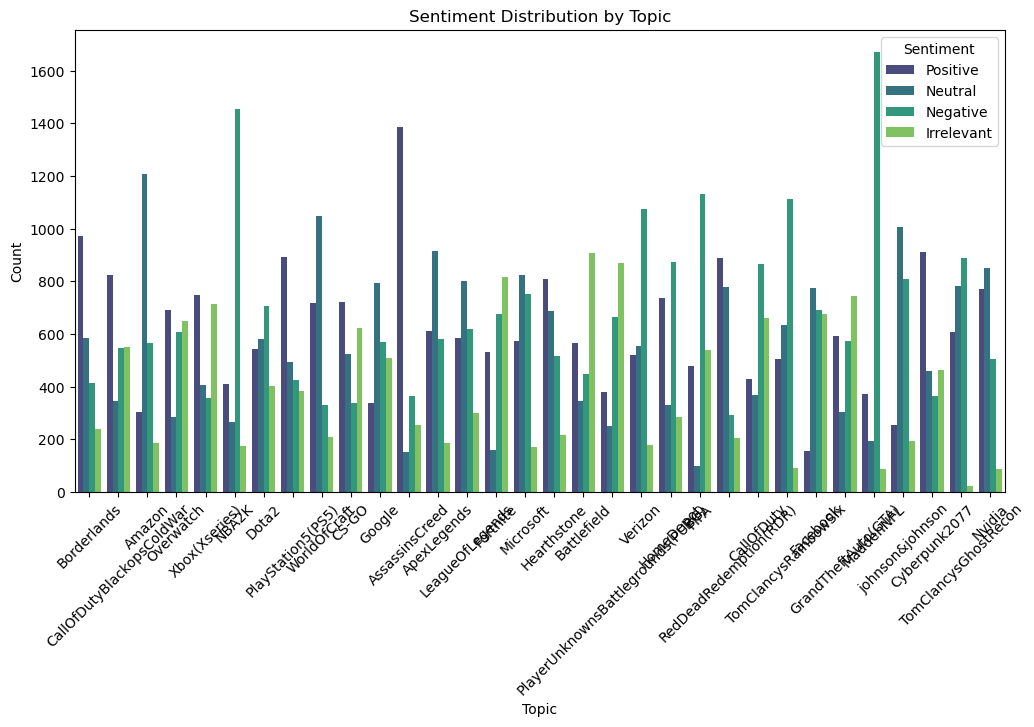

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Topic', hue='Sentiment', palette='viridis')
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()